Reading data from motion list XY[2]: Ta_paddle
Reading motion list from module:  6K Compumotor
No 3302 boards used.
SIS 3305 boards used = [1, 2]
SIS 3305 effective clock rate: Board 1 = 5000.0 MHz
SIS 3305 effective clock rate: Board 2 = 5000.0 MHz
---------- SIS 3305 list of enabled channels (4) ----------
[ 0] Board 1, Channel 1: Bx-P25mov
[ 1] Board 1, Channel 5: By-P25mov
[ 2] Board 2, Channel 1: Bz-P25mov
[ 3] Board 2, Channel 5: By-P26fxd
------------------------------------------------------------
Reading SIS 3305...
------------------------------------------------------------
Data geometry = x-line
Read Channels = 0   1   2
Shot range    = 8 to 8
X value range = 0 to 0
Y value range = 0 to 0
 (xx/yy/zz/shots/steps/chan) = (1/1/1/1/1/1) of (1/1/1/1/1/3)1 1
Reading config name /Raw data + config/SIS crate/siscf0-4ch-5GHz-1Mpnts-200us [Slot 13: SIS 3305 FPGA 1 ch 1]
 (xx/yy/zz/shots/steps/chan) = (1/1/1/1/1/2) of (1/1/1/1/1/3)1 5
Reading config name /Raw data + config/SIS crate/s

31-Mar-24 21:52:42: wavpol Warning: file sampling frequency changes from 4999999999.999955Hz to 4999999999.650224Hz
31-Mar-24 21:52:42: n_batches: 1
31-Mar-24 21:52:42: Total number of steps:1968
31-Mar-24 21:52:42: Total number of possible FFT in the batch no 0 is:1967.0
31-Mar-24 21:52:42: wavpol step: 0 
31-Mar-24 21:52:53: wavpol step: 40 
31-Mar-24 21:53:03: wavpol step: 80 
31-Mar-24 21:53:13: wavpol step: 120 
31-Mar-24 21:53:23: wavpol step: 160 
31-Mar-24 21:53:34: wavpol step: 200 
31-Mar-24 21:53:44: wavpol step: 240 
31-Mar-24 21:53:55: wavpol step: 280 
31-Mar-24 21:54:05: wavpol step: 320 
31-Mar-24 21:54:16: wavpol step: 360 
31-Mar-24 21:54:26: wavpol step: 400 
31-Mar-24 21:54:37: wavpol step: 440 
31-Mar-24 21:54:47: wavpol step: 480 
31-Mar-24 21:54:58: wavpol step: 520 
31-Mar-24 21:55:09: wavpol step: 560 
31-Mar-24 21:55:19: wavpol step: 600 
31-Mar-24 21:55:30: wavpol step: 640 
31-Mar-24 21:55:40: wavpol step: 680 
31-Mar-24 21:55:51: wavpol step: 720 
31-Mar-24

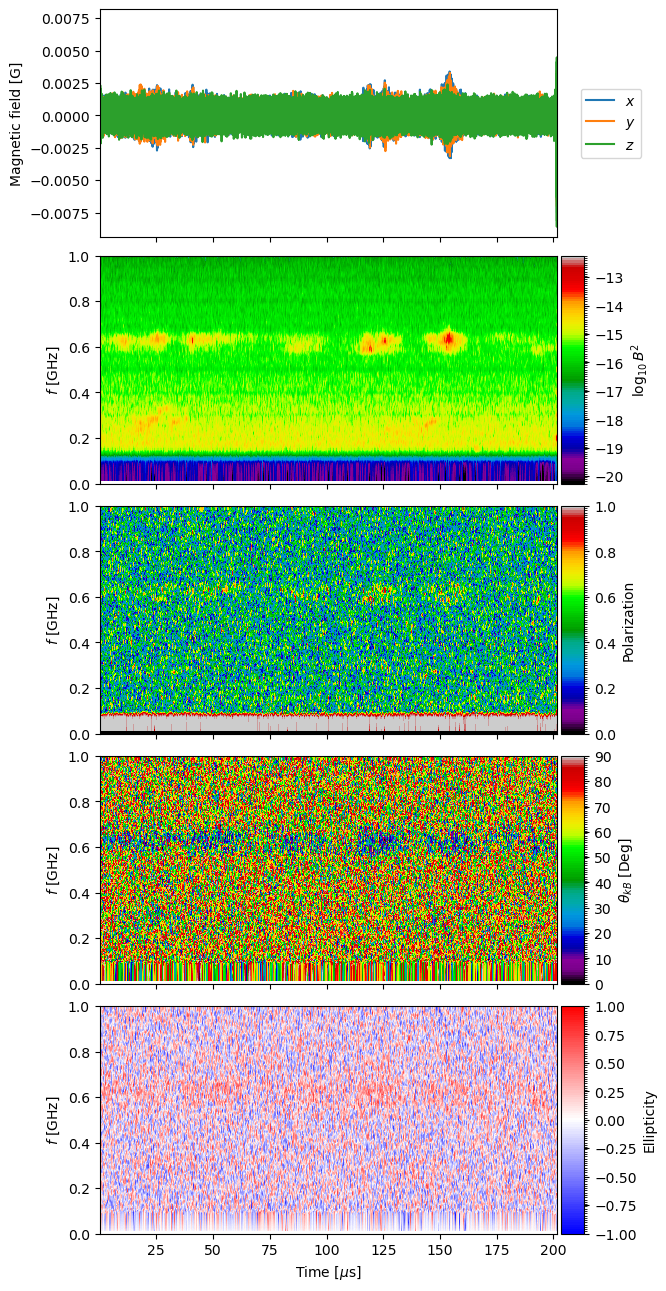

In [2]:
from read_lapd import read_lapd_data
from bdot_process import emf2bw_areav
import numpy as np
import matplotlib.pyplot as plt
import pyspedas
from matplotlib import ticker, colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import h5py
from bdot_process import emf2bw
import pickle 

datapath = '/data/BAPSF_Data/Energetic_Electron_Ring/jul2021/'
# filename = '04-bfield-p25-plane-He-1kG-uwave-l5ms-mirror-min-305G.hdf5'
# filename = '05-bfield-bmirror-scan-p25-xline-uwave-l5ms-mirror-min-200G.hdf5'
# filename = '06-bfield-bmirror-scan-p25-xline-uwave-l5ms-mirror-min-220G.hdf5'
# filename = '07-bfield-bmirror-scan-p25-xline-uwave-l5ms-mirror-min-238G.hdf5'
# filename = '09-bfield-bmirror-scan-p25-xline-uwave-l5ms-mirror-min-265G.hdf5'
# filename = '10-bfield-bmirror-scan-p25-xline-uwave-l5ms-mirror-min-285G.hdf5'
# filename = '11-bfield-bmirror-scan-p25-xline-uwave-l5ms-mirror-min-305G.hdf5'
# filename =  '12-bfield-bmirror-scan-p25-xline-uwave-l5ms-mirror-min-320G.hdf5'
filename = '13-bfield-bmirror-scan-p25-xline-uwave-l3ms-mirror-min-340G.hdf5'
# filename = '14-bfield-bmirror-scan-p25-xline-uwave-l3ms-mirror-min-320G.hdf5'
# filename = '15-bfield-bmirror-scan-p25-xline-uwave-l3ms-mirror-min-360G.hdf5'
# filename = '16-bfield-bmirror-scan-p25-xline-uwave-l3ms-mirror-min-380G.hdf5'
# filename = '17-bfield-p25-xline-uwave-l3ms-long-mirror-min-305G.hdf5'
# filename = '18-bfield-p25-xline-uwave-l3ms-asym-mirrorS-min-305G.hdf5'
# filename = '19-bfield-p25-xline-uwave-l3ms-asym-mirrorN-min-305G.hdf5'
# filename = '20-bfield-tscan-p25-xline-uwave-l3ms-daq-9ms-mirror-min-305G.hdf5'
# filename = '21-bfield-tscan-p25-xline-uwave-13ms-daq-7ms-mirror-min-305G.hdf5'
# filename = '22-bfield-tscan-p25-xline-uwave-13ms-daq-5ms-mirror-min-305G.hdf5'
# filename = '23-bfield-tscan-p25-xline-uwave-13ms-daq-3ms-mirror-min-305G.hdf5'
# filename = '27-bfield-p25-xline-uwave-13ms-at-10ms-mirror-min-305G.hdf5'
# filename = '29-bfield-p25-xline-uwave-13ms-at-0ms-mirror-min-305G.hdf5'
runid = filename[0:2]
filepath = datapath + filename
data = read_lapd_data(filepath, rchan=[0, 1, 2], rshot=[8], xrange=[0], yrange=[0])

# Not sure how to get this one, remember to ask Xin!

area = [1.889e-1, 1.843e-1, 1.501e-1]

fs = 1.0 / data['dt'][0]
lowcut = 1.5e8
highcut = 1e9
bx = emf2bw(np.squeeze(data['data'])[:, 0], area[0], \
        lowcut, highcut, fs, rm_radio=1)
by = emf2bw(np.squeeze(data['data'])[:, 1], area[1], \
        lowcut, highcut, fs, rm_radio=1)
bz = emf2bw(np.squeeze(data['data'])[:, 2], area[2], \
        lowcut, highcut, fs, rm_radio=1)
# bx = emf2bw_areav(np.squeeze(data['data'])[:, 0], areav[0], \
#         lowcut, highcut, fs, rm_radio=1)
# by = emf2bw_areav(np.squeeze(data['data'])[:, 1], areav[1], \
#         lowcut, highcut, fs, rm_radio=1)
# bz = emf2bw_areav(np.squeeze(data['data'])[:, 2], areav[2], \
#         lowcut, highcut, fs, rm_radio=1)

# truncate time series at the beginning and end sections
ntrunc = 100
bx = bx[ntrunc:-ntrunc]
by = by[ntrunc:-ntrunc]
bz = bz[ntrunc:-ntrunc]
tt = data['time'][ntrunc:-ntrunc]

# Number of points in FFT
nopfft = 1024
# The amount of overlap between successive FFT intervals
steplength = nopfft / 2
# No. of bins in frequency domain for averaging [1, 7]
bin_freq = 7

result = pyspedas.analysis.twavpol.wavpol(tt, bx, by, bz, nopfft=nopfft, steplength=steplength, bin_freq=bin_freq)
fig, axs = plt.subplots(5, 1, figsize=[6.4, 12.8],\
        sharex=True, constrained_layout=True)




(timeline, freqline, powspec, degpol, waveangle,
              elliptict, helict, pspec3, err_flag) = result
# with open('my_test_tuple.pkl', 'wb') as file:
#     pickle.dump(result, file)
tgrid, fgrid = np.meshgrid(timeline, freqline)
tfactor = 1e6

fig.subplots_adjust(right=0.82)

ax = axs[0]
ax.plot(tt*tfactor, bx, label=r'$x$')
ax.plot(tt*tfactor, by, label=r'$y$')
ax.plot(tt*tfactor, bz, label=r'$z$')
ax.set_xlim([tt[0]*tfactor, tt[-1]*tfactor])
ax.set_ylabel(r'Magnetic field [G]')
ax.legend(ncol=1, loc='center right', bbox_to_anchor=(1.2,0.5))

ax = axs[1]
cmap = plt.get_cmap('nipy_spectral')
logpow = np.log10(powspec)
vmax = np.max(logpow)
vmin = vmax - 8
vlvs = np.linspace(vmin, vmax, 101)
norm = colors.BoundaryNorm(vlvs, ncolors=cmap.N)
im = ax.pcolormesh(tgrid*tfactor, fgrid/1e9, logpow.T, cmap=cmap, norm=norm, shading = 'nearest')
ax.set_ylim([0, highcut/1e9])
ax.set_ylabel(r'$f$ [GHz]')
# colorbar
l = ticker.AutoLocator()
l.create_dummy_axis()
ticks = l.tick_values(vmin, vmax)
axins = inset_axes(ax, width="5%", height="100%", loc='lower left',\
        bbox_to_anchor=(1.01, 0, 1, 1), bbox_transform=ax.transAxes,\
        borderpad=0)
cb = fig.colorbar(im, cax=axins, ticks=ticks, orientation='vertical')
cb.ax.set_ylabel(r'$\log_{10} B^2$')

ax = axs[2]
cmap = plt.get_cmap('nipy_spectral')
vmax = 1
vmin = 0
vlvs = np.linspace(vmin, vmax, 101)
norm = colors.BoundaryNorm(vlvs, ncolors=cmap.N)
im = ax.pcolormesh(tgrid*tfactor, fgrid/1e9, degpol.T, cmap=cmap, norm=norm,shading = 'nearest')
ax.set_ylim([0, highcut/1e9])
ax.set_ylabel(r'$f$ [GHz]')
# colorbar
l = ticker.AutoLocator()
l.create_dummy_axis()
ticks = l.tick_values(vmin, vmax)
axins = inset_axes(ax, width="5%", height="100%", loc='lower left',\
        bbox_to_anchor=(1.01, 0, 1, 1), bbox_transform=ax.transAxes,\
        borderpad=0)
cb = fig.colorbar(im, cax=axins, ticks=ticks, orientation='vertical')
cb.ax.set_ylabel('Polarization')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()

ax = axs[3]
cmap = plt.get_cmap('nipy_spectral')
vmax = 90
vmin = 0
vlvs = np.linspace(vmin, vmax, 101)
norm = colors.BoundaryNorm(vlvs, ncolors=cmap.N)
im = ax.pcolormesh(tgrid*tfactor, fgrid/1e9, np.rad2deg(waveangle).T, cmap=cmap, norm=norm,shading = 'nearest')
ax.set_ylabel(r'$f$ [GHz]')
ax.set_ylim([0, highcut/1e9])
# colorbar
l = ticker.AutoLocator()
l.create_dummy_axis()
ticks = l.tick_values(vmin, vmax)
axins = inset_axes(ax, width="5%", height="100%", loc='lower left',\
        bbox_to_anchor=(1.01, 0, 1, 1), bbox_transform=ax.transAxes,\
        borderpad=0)
cb = fig.colorbar(im, cax=axins, ticks=ticks, orientation='vertical')
cb.ax.set_ylabel(r'$\theta_{kB}$ [Deg]')

ax = axs[4]
cmap = plt.get_cmap('bwr')
vmax = 1
vmin = -1
vlvs = np.linspace(vmin, vmax, 101)
norm = colors.BoundaryNorm(vlvs, ncolors=cmap.N)
im = ax.pcolormesh(tgrid*tfactor, fgrid/1e9, elliptict.T, cmap=cmap, norm=norm,shading = 'nearest')
ax.set_ylim([0, highcut/1e9])
ax.set_xlabel(r'Time [$\mu$s]')
ax.set_ylabel(r'$f$ [GHz]')
# colorbar
l = ticker.AutoLocator()
l.create_dummy_axis()
ticks = l.tick_values(vmin, vmax)
axins = inset_axes(ax, width="5%", height="100%", loc='lower left',\
        bbox_to_anchor=(1.01, 0, 1, 1), bbox_transform=ax.transAxes,\
        borderpad=0)
cb = fig.colorbar(im, cax=axins, ticks=ticks, orientation='vertical')
cb.ax.set_ylabel('Ellipticity')


# plt.tight_layout()
#plt.savefig('tst_wavpol_12.png', dpi=300)
plt.show()

31-Mar-24 22:01:42: /tmp/ipykernel_693797/493575779.py:3: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(right=0.82)



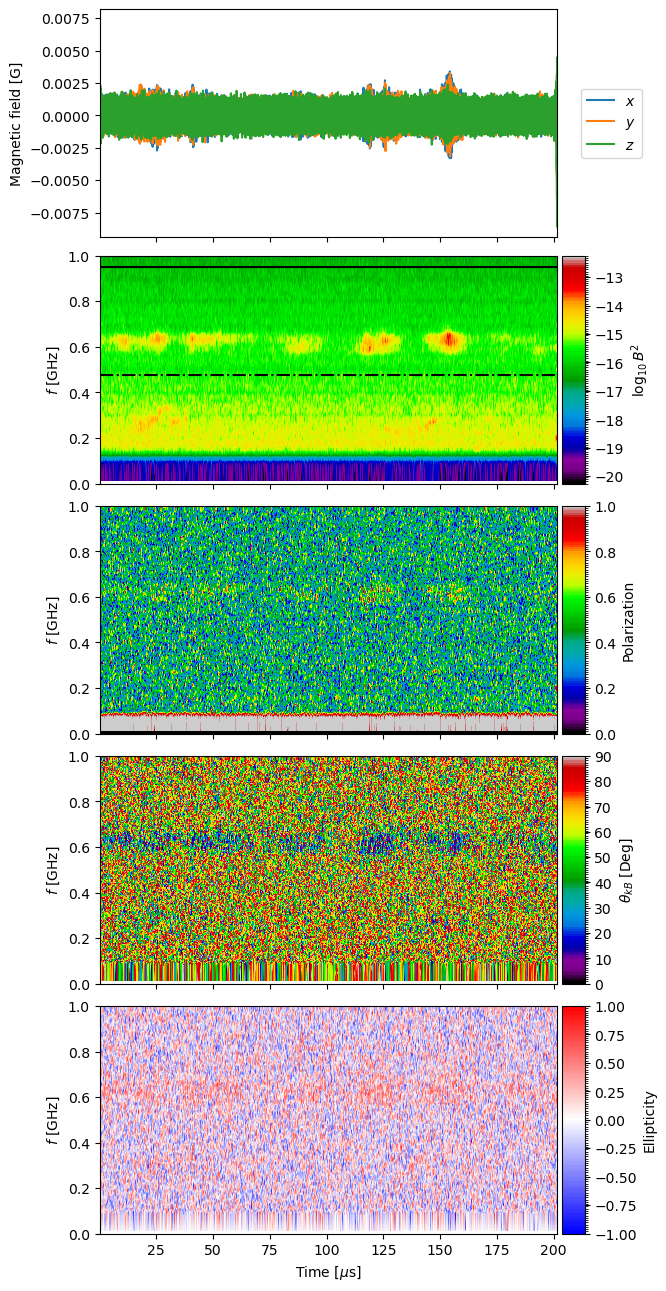

In [3]:
fig, axs = plt.subplots(5, 1, figsize=[6.4, 12.8],\
        sharex=True, constrained_layout=True)
fig.subplots_adjust(right=0.82)

ax = axs[0]
ax.plot(tt*tfactor, bx, label=r'$x$')
ax.plot(tt*tfactor, by, label=r'$y$')
ax.plot(tt*tfactor, bz, label=r'$z$')
ax.set_xlim([tt[0]*tfactor, tt[-1]*tfactor])
ax.set_ylabel(r'Magnetic field [G]')
ax.legend(ncol=1, loc='center right', bbox_to_anchor=(1.2,0.5))

ax = axs[1]
cmap = plt.get_cmap('nipy_spectral')
logpow = np.log10(powspec)
vmax = np.max(logpow)
vmin = vmax - 8
vlvs = np.linspace(vmin, vmax, 101)
norm = colors.BoundaryNorm(vlvs, ncolors=cmap.N)
im = ax.pcolormesh(tgrid*tfactor, fgrid/1e9, logpow.T, cmap=cmap, norm=norm, shading = 'nearest')
ax.set_ylim([0, highcut/1e9])
ax.set_ylabel(r'$f$ [GHz]')
# colorbar
l = ticker.AutoLocator()
l.create_dummy_axis()
ticks = l.tick_values(vmin, vmax)
axins = inset_axes(ax, width="5%", height="100%", loc='lower left',\
        bbox_to_anchor=(1.01, 0, 1, 1), bbox_transform=ax.transAxes,\
        borderpad=0)
cb = fig.colorbar(im, cax=axins, ticks=ticks, orientation='vertical')
cb.ax.set_ylabel(r'$\log_{10} B^2$')

ax = axs[2]
cmap = plt.get_cmap('nipy_spectral')
vmax = 1
vmin = 0
vlvs = np.linspace(vmin, vmax, 101)
norm = colors.BoundaryNorm(vlvs, ncolors=cmap.N)
im = ax.pcolormesh(tgrid*tfactor, fgrid/1e9, degpol.T, cmap=cmap, norm=norm,shading = 'nearest')
ax.set_ylim([0, highcut/1e9])
ax.set_ylabel(r'$f$ [GHz]')
# colorbar
l = ticker.AutoLocator()
l.create_dummy_axis()
ticks = l.tick_values(vmin, vmax)
axins = inset_axes(ax, width="5%", height="100%", loc='lower left',\
        bbox_to_anchor=(1.01, 0, 1, 1), bbox_transform=ax.transAxes,\
        borderpad=0)
cb = fig.colorbar(im, cax=axins, ticks=ticks, orientation='vertical')
cb.ax.set_ylabel('Polarization')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()

ax = axs[3]
cmap = plt.get_cmap('nipy_spectral')
vmax = 90
vmin = 0
vlvs = np.linspace(vmin, vmax, 101)
norm = colors.BoundaryNorm(vlvs, ncolors=cmap.N)
im = ax.pcolormesh(tgrid*tfactor, fgrid/1e9, np.rad2deg(waveangle).T, cmap=cmap, norm=norm,shading = 'nearest')
ax.set_ylabel(r'$f$ [GHz]')
ax.set_ylim([0, highcut/1e9])
# colorbar
l = ticker.AutoLocator()
l.create_dummy_axis()
ticks = l.tick_values(vmin, vmax)
axins = inset_axes(ax, width="5%", height="100%", loc='lower left',\
        bbox_to_anchor=(1.01, 0, 1, 1), bbox_transform=ax.transAxes,\
        borderpad=0)
cb = fig.colorbar(im, cax=axins, ticks=ticks, orientation='vertical')
cb.ax.set_ylabel(r'$\theta_{kB}$ [Deg]')

ax = axs[4]
cmap = plt.get_cmap('bwr')
vmax = 1
vmin = -1
vlvs = np.linspace(vmin, vmax, 101)
norm = colors.BoundaryNorm(vlvs, ncolors=cmap.N)
im = ax.pcolormesh(tgrid*tfactor, fgrid/1e9, elliptict.T, cmap=cmap, norm=norm,shading = 'nearest')
ax.set_ylim([0, highcut/1e9])
ax.set_xlabel(r'Time [$\mu$s]')
ax.set_ylabel(r'$f$ [GHz]')
# colorbar
l = ticker.AutoLocator()
l.create_dummy_axis()
ticks = l.tick_values(vmin, vmax)
axins = inset_axes(ax, width="5%", height="100%", loc='lower left',\
        bbox_to_anchor=(1.01, 0, 1, 1), bbox_transform=ax.transAxes,\
        borderpad=0)
cb = fig.colorbar(im, cax=axins, ticks=ticks, orientation='vertical')
cb.ax.set_ylabel('Ellipticity')

axs[1].axhline(y = 0.9517,xmin = 0, xmax = 200, color = 'black')

axs[1].axhline(y = 0.9517/2,xmin = 0, xmax = 200, color = 'black',linestyle = '-.')
plt.savefig('tst_wavpol_13.png', dpi=300)

plt.show()

In [15]:
im

In [16]:
logpow

array([[-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       ...,
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])